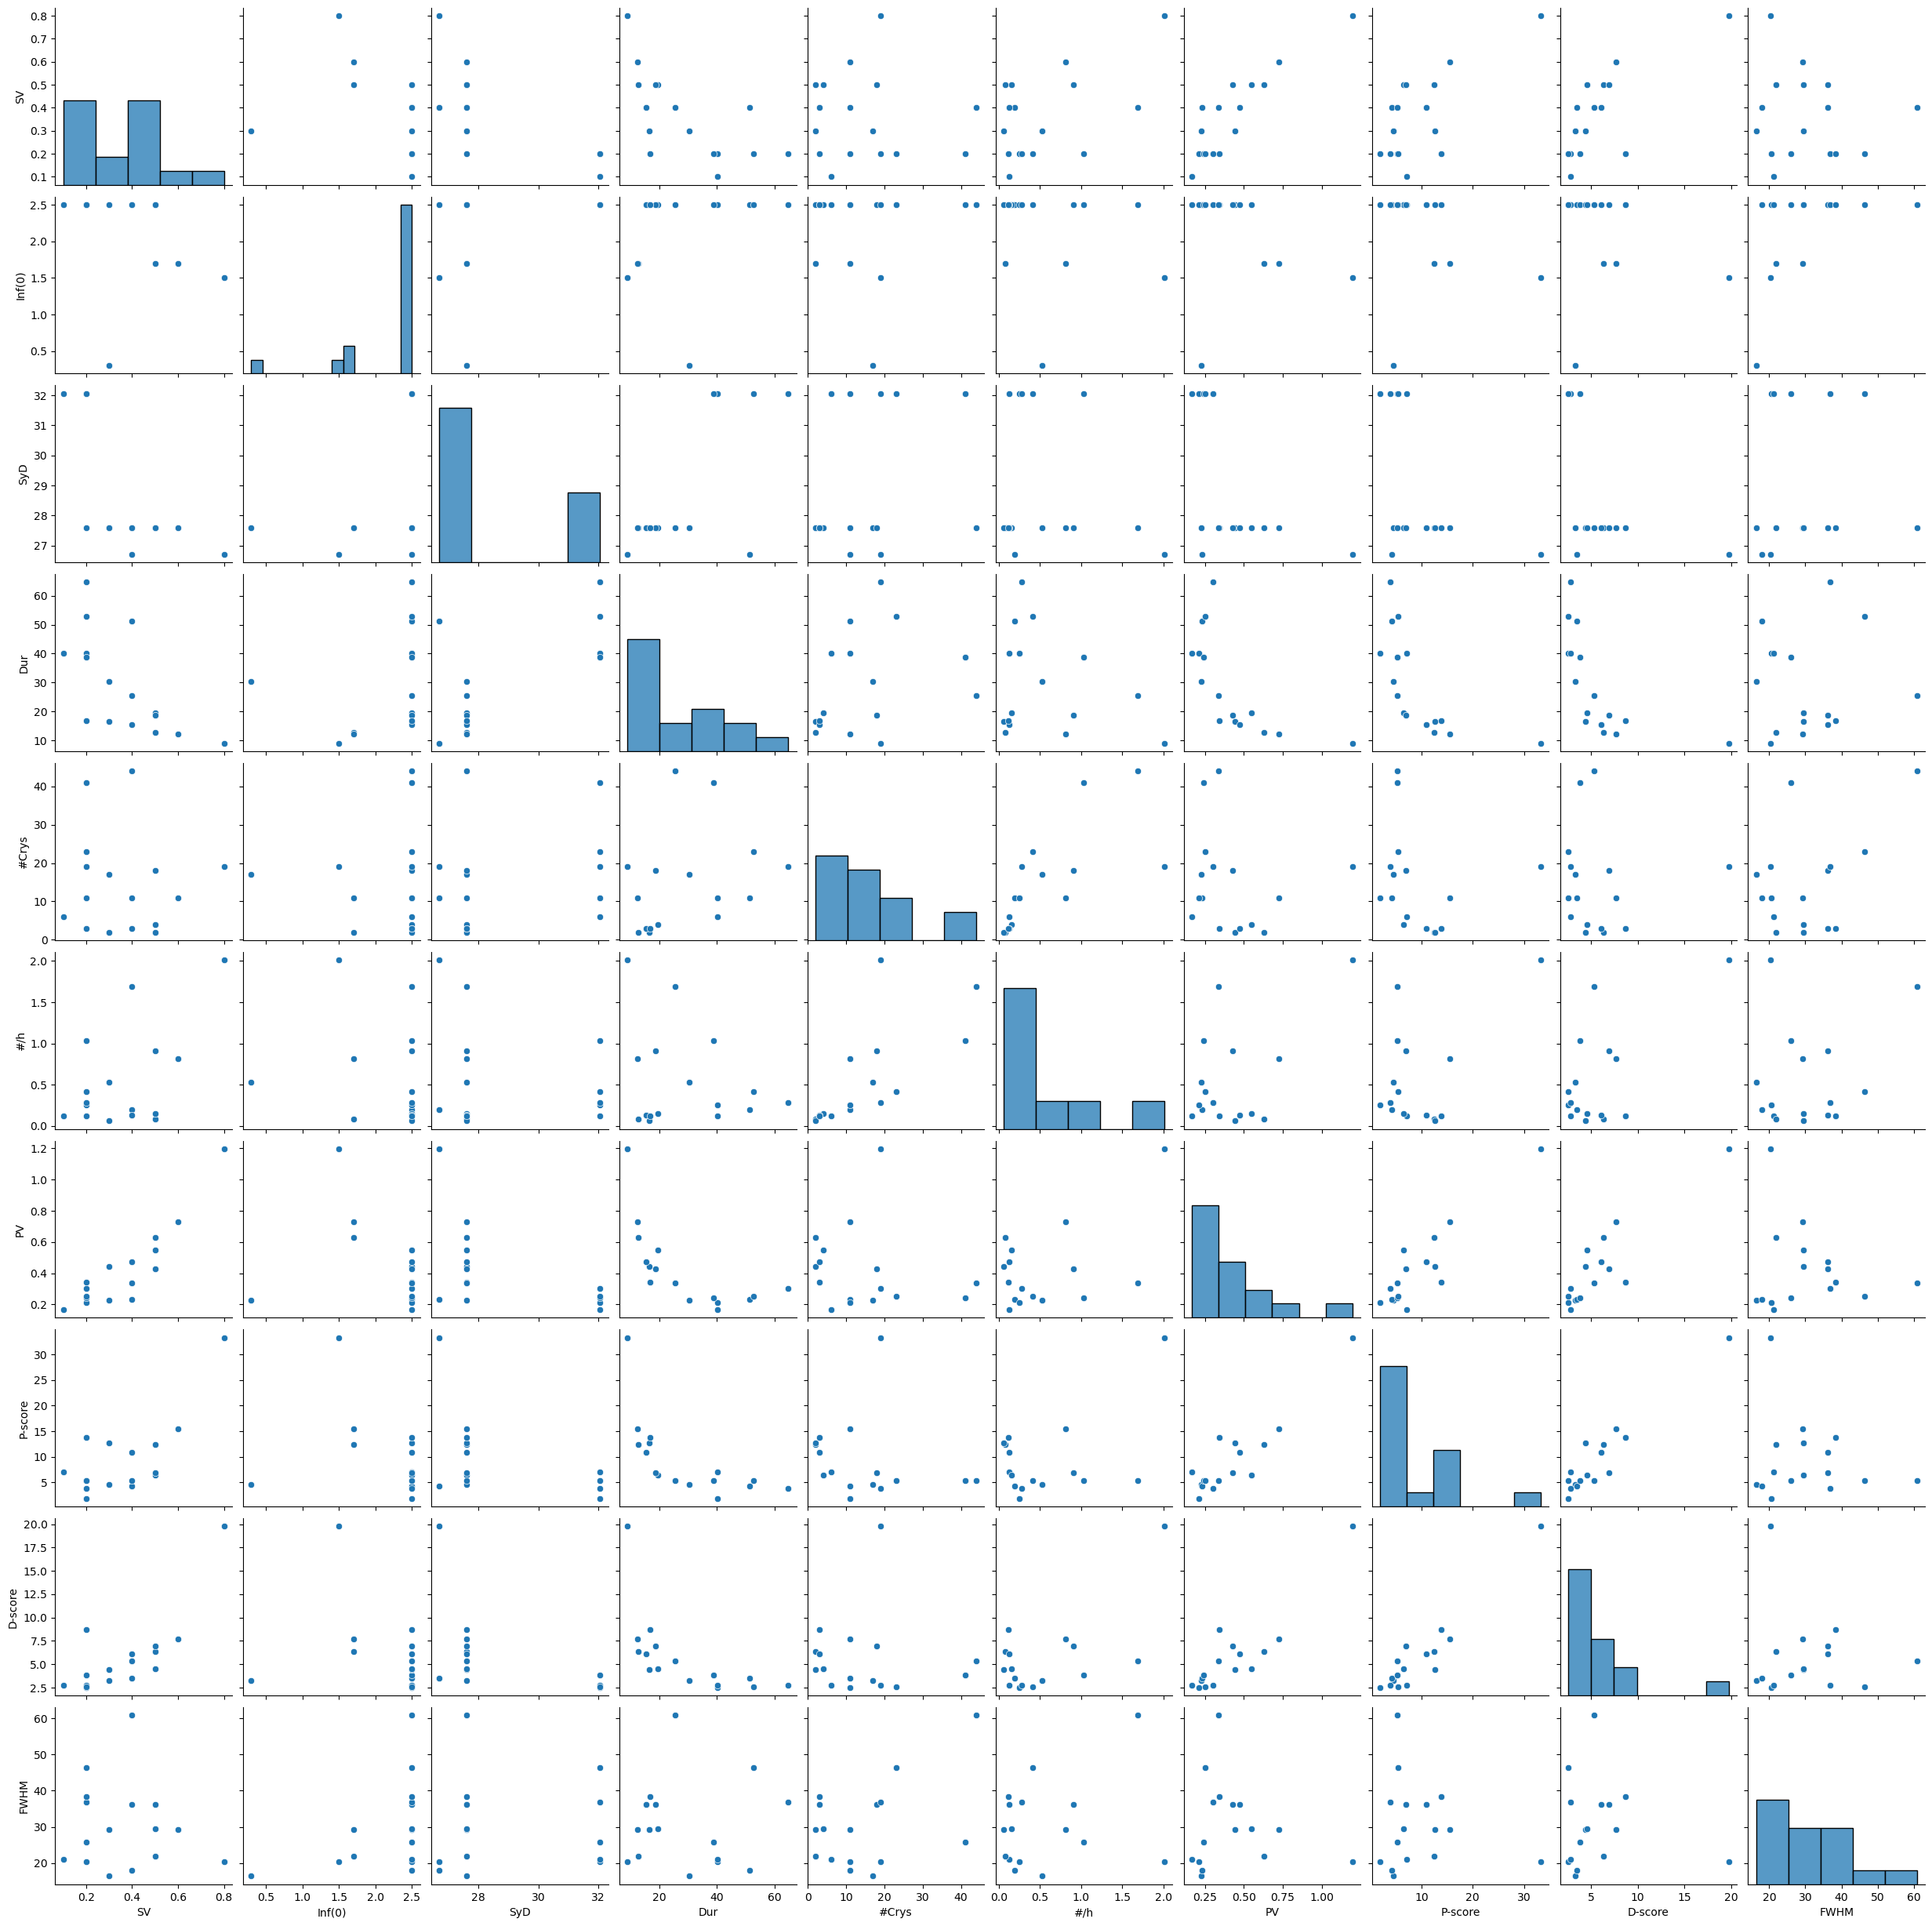

In [1]:
#filename = input('Enter filename\n')
filename = "omega-values.xlsx"
ans="FWHM"

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns #データ表示のためのライブラリ

df = pd.read_excel(filename, index_col=0)

sns.pairplot(df) #データ表示
plt.show()

In [2]:
from sklearn.ensemble import RandomForestRegressor #ランダムフォレストを行うライブラリ
from sklearn.model_selection import train_test_split #データを分割するライブラリ

col=df.columns.drop(ans)

X, Y = df[col], df[ans]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=1) #X,YをAIに学習させるデータと、テスト用のデータに分ける

RF= RandomForestRegressor()
RF.fit(X_train, Y_train)
RF.fit(X, Y)

RandomForestRegressor()

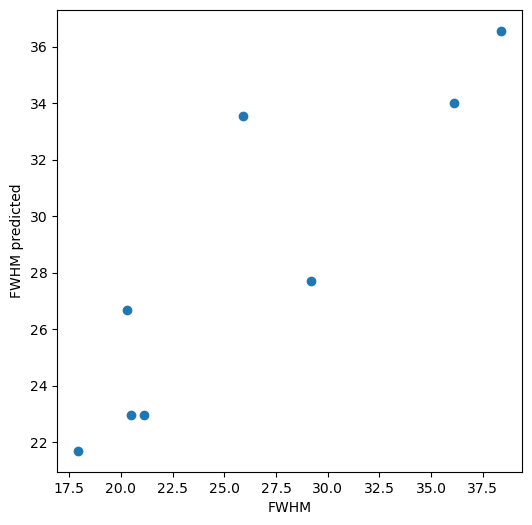

In [3]:
Y_test_pred  = RF.predict(X_test)

plt.figure(figsize=(6,6))
plt.scatter(Y_test,Y_test_pred)
plt.xlabel(ans)
plt.ylabel(ans+" predicted")

plt.show()

Coefficients: [-1.33671699e+02  1.00471162e+01 -5.41767914e+00 -1.19366098e-02
  2.37703054e-01  1.27192317e+01  1.09724135e+02 -1.93783569e+00
 -7.96122132e-01] Intercept: 179.48582092958756


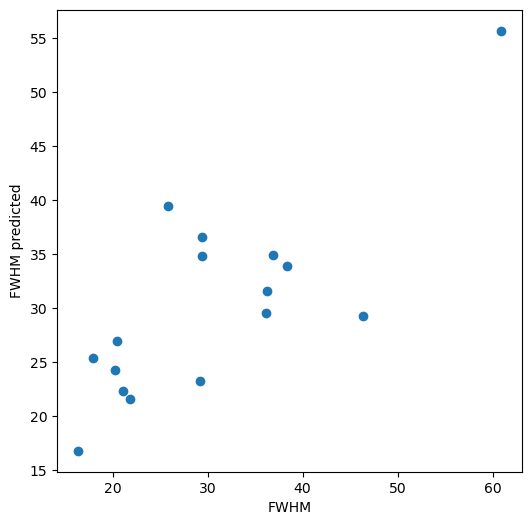

FWHMmean squared error:  51.426690629040145


In [4]:
#目的変数(予測したいもの)をYに代入,Xはそれ以外すべての列が代入される
col=df.columns.drop(ans)

X=df[col]
Y=df[ans]

from sklearn import linear_model #機械学習のライブラリsklearnから線形回帰の機能(linear_model)をインポート
LR=linear_model.LinearRegression() #線形回帰の機能(クラス)をLRに代入
LR.fit(X, Y)  #重回帰分析の実行

Y_predict = LR.predict(X) #重回帰式にXを代入して、Yの予測を算出
print("Coefficients:",LR.coef_,"Intercept:",LR.intercept_)

import matplotlib.pyplot as plt #グラフを表示するライブラリ
plt.figure(figsize=(6,6))
plt.scatter(Y,Y_predict) #YとYの予測値を表示
plt.xlabel(ans)
plt.ylabel(ans+" predicted")

# min_value, max_value = -0.1, 0.1
# plt.xlim(min_value,max_value)
# plt.ylim(min_value,max_value)

plt.show()

from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(Y,Y_predict)
print(ans+"mean squared error: ",MSE)

score 1.0


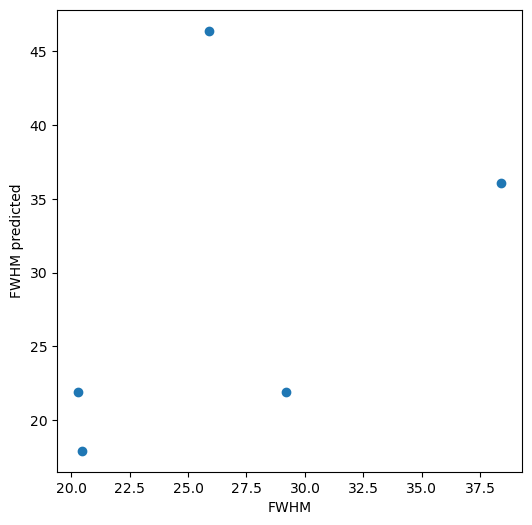

In [7]:
from sklearn.model_selection import train_test_split #データを分割するライブラリ
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1) #X,YをAIに学習させるデータと、テスト用のデータに分ける
from sklearn.tree import DecisionTreeRegressor, plot_tree

DT = DecisionTreeRegressor(max_depth=8)
DT.fit(X_train, Y_train)
Y_test_pred  = DT.predict(X_test)

plt.figure(figsize=(6,6))
plt.scatter(Y_test,Y_test_pred)
plt.xlabel(ans)
plt.ylabel(ans+" predicted")

# min_value, max_value = -0.1, 0.1
# plt.xlim(min_value,max_value)
# plt.ylim(min_value,max_value)


print(f"score {DT.score(X_test,Y_test_pred)}")
plt.show()

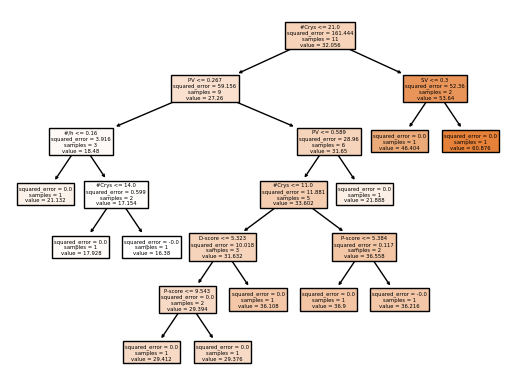

In [8]:
#学習で作成した決定木のモデルを確認
plot_tree(DT, feature_names=col, filled=True)
plt.show()

In [9]:
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(Y_test,Y_test_pred)
print(ans+"の平均二乗誤差: ",MSE)

FWHMの平均二乗誤差:  97.732656


In [10]:
F=RF.feature_importances_ #Confirm the importance of each parameter
#make a table
FI=pd.DataFrame([df.columns,F]).T
FI.columns=["Parameter","Importance"]
FI

,Parameter,Importance
0,SV,0.032491
1,Inf(0),0.027429
2,SyD,0.028576
3,Dur,0.101297
4,#Crys,0.345692
5,#/h,0.063686
6,PV,0.267158
7,P-score,0.048395
8,D-score,0.085277
9,FWHM,None


In [21]:
col

Index(['RT', 'Humi', 'Conc', 'G', 'P', 'I', 'D', 'Delay', 'Inf(0)', '#Sy',
       'Sol.', 'HT', 'Dur'],
      dtype='object')

In [24]:
type(col[0])

str

In [29]:
import pandas as pd
import numpy as np

test_array = []
values = []

for i in range(len(col)):
    val = float(input('input ' + col[i] + '\n '))
    values.append(val)
    
test_array.append(values)
ndarray = np.array(test_array)
test_frame = pd.DataFrame(ndarray, columns=col)
test_frame

inputRT
  24.02
inputHumi
  37.44
inputConc
  41
inputG
  0.5
inputP
  3
inputI
  0
inputD
  2
inputDelay
  1.5
inputInf(0)
  2.2
input#Sy
  2
inputSol.
  100.16
inputHT
  50
inputDur
  24


,RT,Humi,Conc,G,P,I,D,Delay,Inf(0),#Sy,Sol.,HT,Dur
0,24.02,37.44,41.0,0.5,3.0,0.0,2.0,1.5,2.2,2.0,100.16,50.0,24.0


In [30]:
Y_test_prediction = RF.predict(test_frame)
Y_test_prediction

array([2.8046])